<a href="https://colab.research.google.com/github/DS3001/group22/blob/main/Midterm_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 22 : Project 1

## Data Wrangling

In [23]:
# imports and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read by default 1st sheet of an excel file
df = pd.read_excel('result/GSS.xlsx')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      72390 non-null  int64 
 1   id_       72390 non-null  int64 
 2   wrkstat   72390 non-null  object
 3   hrs1      72390 non-null  object
 4   hrs2      72390 non-null  object
 5   evwork    72390 non-null  object
 6   wrkslf    72390 non-null  object
 7   marital   72390 non-null  object
 8   divorce   72390 non-null  object
 9   spwrksta  72390 non-null  object
 10  sphrs1    72390 non-null  object
 11  sphrs2    72390 non-null  object
 12  spevwork  72390 non-null  object
 13  spwrkslf  72390 non-null  object
 14  spocc10   72390 non-null  object
 15  spind10   72390 non-null  object
 16  degree    72390 non-null  object
 17  spdeg     72390 non-null  object
 18  ballot    72390 non-null  object
dtypes: int64(2), object(17)
memory usage: 10.5+ MB


Variables included:
- **year**: GSS year for this respondent
- **wrkstat**: labor force status
- **hrs1**: number of hours worked last week
- **hrs2**: number of hours usually work a week
- **evwork**: ever work as long as one year
- **wrkslf**: self-employed or works for somebody
- **marital**: marital status
- **divorce**: ever been divorced or seperated
- **spwrksta**: spouse labor force status
- **sphrs1**: number of hrs spouse worked last week
- **sphrs2**: number of hrs spouse usually works a week
- **spevwork**: spouse ever work as long as one year
- **spwrkslf**: spouse self-employed or works for somebody
- **spocc10**: spouse census occupation code (2010)
- **spind10**: spouse industry code (naics 2010)
- **degree**: highest degree
- **spdeg**: spouse highest degree
- **ballot**: ballot used for interview


### Clean year
**year**: GSS year for this respondent

In [25]:
var = 'year'
df[var].unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021,
       2022])

All of the values within the year column are acceptable

### Clean wrkstat
**wkstat**: labor force status

In [26]:
var = 'wrkstat'
df[var].unique()

array(['Working full time', 'Retired', 'Working part time',
       'Keeping house', 'In school',
       'Unemployed, laid off, looking for work',
       'With a job, but not at work because of temporary illness, vacation, strike',
       'Other', '.n:  No answer', '.s:  Skipped on Web',
       '.d:  Do not Know/Cannot Choose'], dtype=object)

Make more concise and replace values that do not provide information with nan

In [27]:
df.loc[df[var] == "Working full time", var] = "Full Time"
df.loc[df[var] == "Working part time", var] = "Part Time"
df.loc[df[var] == "Unemployed, laid off, looking for work", var] = "Unemployed"
df.loc[df[var] == 'With a job, but not at work because of temporary illness, vacation, strike', var] = "Illness/Vaction/Strike"
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan

In [28]:
df[var].unique()

array(['Full Time', 'Retired', 'Part Time', 'Keeping house', 'In school',
       'Unemployed', 'Illness/Vaction/Strike', 'Other', nan], dtype=object)

### Clean hrs1
**hrs1**: number of hours worked last week

In [29]:
df['hrs1'].unique()

array(['.i:  Inapplicable', '27', '40', '52', '35', '45', '70', '60',
       '42', '23', '55', '50', '6', '37', '36',
       '.d:  Do not Know/Cannot Choose', '48', '16', '24', '20', '80',
       '65', '15', '39', '25', '22', '44', '26', '38', '12', '41', '84',
       '18', '54', '32', '3', '29', '51', '30', '.n:  No answer',
       '89+ hrs', '43', '58', '28', '46', '8', '9', '19', '14', '66',
       '61', '49', '10', '72', '34', '75', '53', '7', '21', '47', '57',
       '71', '13', '5', '31', '17', '56', '4', '0', '33', '1', '68', '11',
       '2', '85', '62', '59', '78', '77', '64', '63', '67', '73', '88',
       '69', '76', '74', '81', '79', '86', '87', '83', '82',
       '.s:  Skipped on Web'], dtype=object)

Replace all values that do not provide information with nan

In [30]:
df.loc[df['hrs1'] == ".i:  Inapplicable", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".d:  Do not Know/Cannot Choose", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".n:  No answer", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".s:  Skipped on Web", 'hrs1'] = np.nan

Replace values listed as 89+ hrs with 95 to give distinct value

In [31]:
df.loc[df['hrs1'] == '89+ hrs', 'hrs1'] = '95';

Convert to numeric values

In [32]:
df['hrs1'] = pd.to_numeric(df['hrs1'])

In [33]:
df['hrs1'].value_counts()

40.0    14519
50.0     3127
60.0     2144
45.0     2127
30.0     1388
        ...  
69.0        8
81.0        5
79.0        3
71.0        3
87.0        3
Name: hrs1, Length: 90, dtype: int64

### Clean hrs2
**hrs2**: number of hours usually work a week

In [34]:
var = 'hrs2'
df[var].unique()

array(['.i:  Inapplicable', '40', '55', '15', '56', '50', '10', '35',
       '.n:  No answer', '70', '16', '37', '30', '48', '20', '5', '25',
       '60', '32', '52', '45', '.d:  Do not Know/Cannot Choose', '75',
       '24', '4', '89+ hrs', '44', '34', '13', '8', '12', '6', '80', '39',
       '21', '47', '36', '38', '33', '46', '42', '43', '11', '66', '23',
       '7', '58', '18', '65', '84', '17', '68', '41', '1', '2', '0', '72',
       '28', '57', '3', '22', '27', '26', '9', '.s:  Skipped on Web'],
      dtype=object)

Replace values that do not provide information with nan.

Replace Full Time, Part Time, and Unemployed with average hours spent inthose positions

Replace 89+ hours with 95

In [35]:
df.loc[df[var] == ".i:  Inapplicable", 'hrs2'] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", 'hrs2'] = np.nan
df.loc[df[var] == ".n:  No answer", 'hrs2'] = np.nan
df.loc[df[var] == '89+ hrs', 'hrs2'] = '95'
df.loc[df[var] == "Full Time", 'hrs2'] = '40'
df.loc[df[var] == "Part Time", 'hrs2'] = '25'
df.loc[df[var] == "Unemployed", 'hrs2'] = '0'

Convert to numeric values

In [36]:
df[var] = pd.to_numeric(df['hrs1'])

In [37]:
df[var].value_counts()

40.0    14519
50.0     3127
60.0     2144
45.0     2127
30.0     1388
        ...  
69.0        8
81.0        5
79.0        3
71.0        3
87.0        3
Name: hrs2, Length: 90, dtype: int64

### Clean evwork
**evwork**: ever work as long as one year

In [38]:
var = 'evwork'
df[var].unique()

array(['.i:  Inapplicable', 'YES', 'NO', '.n:  No answer',
       '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web'],
      dtype=object)

Replace values that do not provide information with nan.

In [39]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan

In [40]:
df[var].unique()

array([nan, 'YES', 'NO'], dtype=object)

### Clean wrkslf
**wrkslf**: self-employed or works for somebody

In [41]:
var = 'wrkslf'
df[var].unique()

array(['Someone else', '.i:  Inapplicable', 'Self-employed',
       '.n:  No answer', '.d:  Do not Know/Cannot Choose',
       '.s:  Skipped on Web'], dtype=object)

Replace values that do not provide information with nan.

In [42]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan

In [43]:
df[var].unique()

array(['Someone else', nan, 'Self-employed'], dtype=object)

### Clean marital
**marital**: marital status

Replace values that do not provide information with nan

In [44]:
df.loc[df['marital'] == ".s:  Skipped on Web", 'marital'] = np.nan
df.loc[df['marital'] == ".d:  Do not Know/Cannot Choose", 'marital'] = np.nan
df.loc[df['marital'] == ".n:  No answer", 'marital'] = np.nan


In [45]:
df['marital'].unique()

array(['Never married', 'Married', 'Divorced', 'Widowed', 'Separated',
       nan], dtype=object)

### Clean divorce
**divorce**: ever been divorced or seperated

Replace values that do not provide information with nan.

In [46]:
df.loc[df['divorce'] == '.n:  No answer', 'divorce'] = np.nan
df.loc[df['divorce'] == '.s:  Skipped on Web', 'divorce'] = np.nan
df.loc[df['divorce'] == '.i:  Inapplicable', 'divorce'] = np.nan
df.loc[df['divorce'] == '.d:  Do not Know/Cannot Choose', 'divorce'] = np.nan


df['divorce'].unique()

array([nan, 'NO', 'YES'], dtype=object)

### Clean spwrksta
**spwrksta**: spouse labor force status

In [47]:
var = 'spwrksta'
df[var].unique()

array(['.i:  Inapplicable', 'KEEPING HOUSE', 'WORKING FULLTIME',
       'TEMP NOT WORKING', 'WORKING PARTTIME', 'RETIRED',
       'UNEMPL, LAID OFF', 'SCHOOL', 'OTHER', '.n:  No answer',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

Replace values that do not provide information with nan.

Replace other values with values to match wrksta.

In [48]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == "WORKING FULLTIME", var] = "Full Time"
df.loc[df[var] == "WORKING PARTTIME", var] = "Part Time"
df.loc[df[var] == "UNEMPL, LAID OFF", var] = "Unemployed"
df.loc[df[var] == "TEMP NOT WORKING", var] = "Illness/Vaction/Strike"
df.loc[df[var] == "SCHOOL", var] = "In School"
df.loc[df[var] == "KEEPING HOUSE", var] = "Keeping House"
df.loc[df[var] == "OTHER", var] = "Other"
df.loc[df[var] == "RETIRED", var] = "Retired"

In [49]:
df[var].unique()

array([nan, 'Keeping House', 'Full Time', 'Illness/Vaction/Strike',
       'Part Time', 'Retired', 'Unemployed', 'In School', 'Other'],
      dtype=object)

### Clean sphrs1
**sphrs1**: number of hrs spouse worked last week

Replace values that do not provide information with nan.

In [50]:
df.loc[df['sphrs1'] == ".i:  Inapplicable", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".d:  Do not Know/Cannot Choose", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".n:  No answer", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".s:  Skipped on Web", 'sphrs1'] = np.nan

df['sphrs1'].unique()

array([nan, '40', '37', '51', '60', '45', '44', '55', '24', '80', '65',
       '50', '75', '16', '36', '72', '15', '62', '20', '70', '63', '48',
       '19', '30', '56', '22', '38', '84', '18', '35', '52', '57', '32',
       '58', '43', '25', '74', '12', '3', '42', '4', '8', '5', '10', '66',
       '28', '89+ hrs', '39', '33', '59', '11', '54', '21', '79', '9',
       '46', '69', '6', '29', '47', '23', '27', '68', '13', '73', '34',
       '76', '49', '14', '78', '41', '64', '53', '77', '82', '26', '85',
       '2', '61', '88', '31', '7', '17', '71', '0', '67', '81', '1', '86',
       '.x:  Not available in this release'], dtype=object)

Replace 89+ hrs with 95.

Convert to numeric values.

In [51]:
df.loc[df['sphrs1'] == ".x:  Not available in this release", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == "89+ hrs", 'sphrs1'] = "95"
df['sphrs1'] = pd.to_numeric(df['sphrs1'])
df['sphrs1'].unique()

array([nan, 40., 37., 51., 60., 45., 44., 55., 24., 80., 65., 50., 75.,
       16., 36., 72., 15., 62., 20., 70., 63., 48., 19., 30., 56., 22.,
       38., 84., 18., 35., 52., 57., 32., 58., 43., 25., 74., 12.,  3.,
       42.,  4.,  8.,  5., 10., 66., 28., 95., 39., 33., 59., 11., 54.,
       21., 79.,  9., 46., 69.,  6., 29., 47., 23., 27., 68., 13., 73.,
       34., 76., 49., 14., 78., 41., 64., 53., 77., 82., 26., 85.,  2.,
       61., 88., 31.,  7., 17., 71.,  0., 67., 81.,  1., 86.])

### Clean sphrs2
**sphrs2**: number of hrs spouse usually works a week

In [52]:
var = 'sphrs2'
df[var].unique()

array(['.i:  Inapplicable', '73', '20', '.d:  Do not Know/Cannot Choose',
       '40', '35', '48', '14', '50', '.n:  No answer', '16', '84', '44',
       '56', '13', '32', '8', '37', '72', '24', '12', '60', '54', '22',
       '43', '25', '38', '49', '30', '45', '36', '65', '57', '89+ hrs',
       '55', '52', '70', '51', '21', '26', '10', '5', '46', '80', '47',
       '1', '42', '39', '33', '27', '18', '15', '34',
       '.s:  Skipped on Web', '9', '.x:  Not available in this release'],
      dtype=object)

Replace values that provide no information with nan.

Replace 89+ hrs with 95.

In [53]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == '89+ hrs', var] = '95'

Convert to numeric values

In [54]:
df[var] = pd.to_numeric(df[var])

In [55]:
df[var].unique()

array([nan, 73., 20., 40., 35., 48., 14., 50., 16., 84., 44., 56., 13.,
       32.,  8., 37., 72., 24., 12., 60., 54., 22., 43., 25., 38., 49.,
       30., 45., 36., 65., 57., 95., 55., 52., 70., 51., 21., 26., 10.,
        5., 46., 80., 47.,  1., 42., 39., 33., 27., 18., 15., 34.,  9.])

### Clean spevwork
**spevwork**: spouse ever work as long as one year

In [56]:
var = 'spevwork'
df[var].unique()

array(['.i:  Inapplicable', 'NO', 'YES', '.n:  No answer',
       '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web',
       '.x:  Not available in this release'], dtype=object)

Replace values that do not provide information with nan.

In [57]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan

In [58]:
df[var].unique()

array([nan, 'NO', 'YES'], dtype=object)

### Clean spwrkslf
**spwrkslf**: spouse self-employed or works for somebody

In [59]:
var = 'spwrkslf'
df[var].unique()

array(['.i:  Inapplicable', 'SOMEONE ELSE', 'SELF-EMPLOYED',
       '.n:  No answer', '.d:  Do not Know/Cannot Choose',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

Replace values that do not provide any information with nan.

Replace other values to match wrkslf.

In [60]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == 'SOMEONE ELSE', var] = 'Someone else'
df.loc[df[var] == 'SELF-EMPLOYED', var] = 'Self-employed'

In [61]:
df[var].unique()

array([nan, 'Someone else', 'Self-employed'], dtype=object)

### Clean spocc10
**spocc10**: spouse census occupation code (2010)

In [62]:
var = 'spocc10'
df[var].unique()

array(['.i:  Inapplicable',
       'Property, real estate, and community association managers',
       'Tax examiners and collectors, and revenue agents',
       'Rolling machine setters, operators, and tenders, metal and plastic',
       'Tire builders',
       'Metal furnace operators, tenders, pourers, and casters',
       'Maids and housekeeping cleaners',
       'Licensed practical and licensed vocational nurses',
       'Hairdressers, hairstylists, and cosmetologists',
       'Retail salespersons',
       'Security guards and gaming surveillance officers',
       '.u:  Uncodable', 'Elementary and middle school teachers',
       'Secretaries and administrative assistants',
       'Customer service representatives',
       'Farmers, ranchers, and other agricultural managers',
       'Lathe and turning machine tool setters, operators, and tenders, metal and plastic',
       '.n:  No answer', 'Waiters and waitresses',
       'Nursing, psychiatric, and home health aides',
       'Misc

Replace values that do not provide information with nan.

In [63]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == ".u:  Uncodable"] = np.nan

In [64]:
df[var].unique()

array([nan, 'Property, real estate, and community association managers',
       'Tax examiners and collectors, and revenue agents',
       'Rolling machine setters, operators, and tenders, metal and plastic',
       'Tire builders',
       'Metal furnace operators, tenders, pourers, and casters',
       'Maids and housekeeping cleaners',
       'Licensed practical and licensed vocational nurses',
       'Hairdressers, hairstylists, and cosmetologists',
       'Retail salespersons',
       'Security guards and gaming surveillance officers',
       'Elementary and middle school teachers',
       'Secretaries and administrative assistants',
       'Customer service representatives',
       'Farmers, ranchers, and other agricultural managers',
       'Lathe and turning machine tool setters, operators, and tenders, metal and plastic',
       'Waiters and waitresses',
       'Nursing, psychiatric, and home health aides',
       'Miscellaneous assemblers and fabricators',
       'News analyst

### Clean spind10
**spind10**: spouse industry code (naics 2010)

In [65]:
var = 'spind10'
df[var].unique()

array(['.i:  Inapplicable', 'Real estate', 'Public finance activities',
       'Nonferrous metal (except aluminum) production and processing',
       'Tire manufacturing', '.n:  No answer', 'Private households',
       'Hospitals', 'Beauty salons',
       'Other direct selling establishments',
       'Executive offices and legislative bodies', nan,
       'Elementary and secondary schools',
       'Professional and commercial equipment and supplies, merchant wholesalers',
       'Office supplies and stationery stores', 'Crop production',
       'Furniture and related product manufacturing', 'Construction',
       '.u:  Uncodable', 'Nursing care facilities',
       'Pottery, ceramics, and plumbing fixture manufacturing',
       'Newspaper publishers', 'Pulp, paper, and paperboard mills',
       ' Restaurants and other food services', 'Gasoline stations',
       'Animal production', 'Truck transportation',
       'Wired telecommunications carriers',
       'Banking and related activities

Replace values that do not provide any information with nan.

In [66]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == ".u:  Uncodable"] = np.nan

### Clean degree
**degree**: highest degree


Replace values that do not provide any information with nan.

In [69]:
df.loc[df['degree'] == ".n:  No answer", 'degree'] = np.nan
df.loc[df['degree'] == ".d:  Do not Know/Cannot Choose", 'degree'] = np.nan
df.loc[df['degree'] == ".s:  Skipped on Web", 'degree'] = np.nan

df['degree'].unique()


array(["Bachelor's", 'Less than high school', 'High school', nan,
       'Graduate', 'Associate/junior college'], dtype=object)

### Clean spdeg
**spdeg**: spouse highest degree

In [70]:
var = 'spdeg'
df[var].unique()

array(['.i:  Inapplicable', 'HIGH SCHOOL', '.n:  No answer', 'GRADUATE',
       'LT HIGH SCHOOL', nan, 'BACHELOR',
       '.d:  Do not Know/Cannot Choose', 'ASSOCIATE/JUNIOR COLLEGE',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

Replace values that do not provide information with nan.

Replace values to match with degree.

In [71]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == "HIGH SCHOOL", var] = "High school"
df.loc[df[var] == "GRADUATE", var] = "Graduate"
df.loc[df[var] == "LT HIGH SCHOOL", var] = "Less than high school"
df.loc[df[var] == "BACHELOR", var] = "Bachelor's"
df.loc[df[var] == "ASSOCIATE/JUNIOR COLLEGE", var] = "Associate/junior college"

In [72]:
df[var].unique()

array([nan, 'High school', 'Graduate', 'Less than high school',
       "Bachelor's", 'Associate/junior college'], dtype=object)

### Clean ballot
**ballot**: ballot used for interview

In [73]:
var = 'ballot'
df[var].unique()

array(['.i:  Inapplicable', nan, 'Ballot b', 'Ballot c', 'Ballot a',
       'Ballot d'], dtype=object)

In [74]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == "Ballot a", var] = 'A'
df.loc[df[var] == "Ballot b", var] = 'B'
df.loc[df[var] == "Ballot c", var] = 'C'
df.loc[df[var] == "Ballot d", var] = 'D'

In [75]:
df[var].unique()

array([nan, 'B', 'C', 'A', 'D'], dtype=object)

## Create DataFrames

In this section we will construct a variety of dataframes to select different combinations

#### df_usable

In [78]:
df_usable = df
df_usable = df_usable[df_usable['hrs1'].notna()]
df_usable = df_usable[df_usable['sphrs1'].notna()]
df_usable.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1615,1973.0,3.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,40.0,NaN,NaN,Someone else,"Painters, construction and maintenance",Construction,Less than high school,Less than high school,NaN
1616,1973.0,4.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,37.0,NaN,NaN,Someone else,Print binding and finishing workers,"Periodical, book, and directory publishers",High school,High school,NaN
1628,1973.0,16.0,Full Time,60.0,60.0,NaN,Self-employed,Married,NO,Full Time,44.0,NaN,NaN,Self-employed,"Bookkeeping, accounting, and auditing clerks",Natural gas distribution,High school,High school,NaN
1649,1973.0,37.0,Part Time,23.0,23.0,NaN,Someone else,Married,NO,Full Time,50.0,NaN,NaN,Someone else,"Sales representatives, wholesale and manufact...",Not specified manufacturing industries,Bachelor's,Bachelor's,NaN
1660,1973.0,48.0,Full Time,60.0,60.0,NaN,Someone else,Married,NO,Full Time,40.0,NaN,NaN,Someone else,Secretaries and administrative assistants,"Colleges and universities, including junior co...",Bachelor's,Graduate,NaN


#### married_df

Create married_df containing all rows containing married participants

In [79]:
married_df = df.loc[df['marital'] == 'Married']
married_df = married_df[married_df['hrs1'].notna()]
married_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1615,1973.0,3.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,40.0,NaN,NaN,Someone else,"Painters, construction and maintenance",Construction,Less than high school,Less than high school,NaN
1616,1973.0,4.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,37.0,NaN,NaN,Someone else,Print binding and finishing workers,"Periodical, book, and directory publishers",High school,High school,NaN
1622,1973.0,10.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Keeping House,NaN,NaN,YES,Someone else,Secretaries and administrative assistants,Fuel dealers,Bachelor's,High school,NaN
1624,1973.0,12.0,Full Time,70.0,70.0,NaN,Self-employed,Married,NO,Keeping House,NaN,NaN,YES,Someone else,Miscellaneous assemblers and fabricators,"Engines, turbines, and power transmission equi...",High school,High school,NaN
1628,1973.0,16.0,Full Time,60.0,60.0,NaN,Self-employed,Married,NO,Full Time,44.0,NaN,NaN,Self-employed,"Bookkeeping, accounting, and auditing clerks",Natural gas distribution,High school,High school,NaN


#### single_df

Create single_df containing all rows containing non-married participants

In [80]:
single_df = df.loc[df['marital'] != 'Married']
single_df = single_df[single_df['hrs1'].notna()]
single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1618,1973.0,6.0,Full Time,52.0,52.0,NaN,Someone else,Divorced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1620,1973.0,8.0,Full Time,35.0,35.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
1623,1973.0,11.0,Full Time,45.0,45.0,NaN,Someone else,Widowed,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN
1631,1973.0,19.0,Full Time,40.0,40.0,NaN,Someone else,Divorced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1642,1973.0,30.0,Full Time,40.0,40.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN


#### divorced_single_df

In [81]:
divorced_single_df = single_df.loc[single_df['divorce'] == 'YES']
divorced_single_df = divorced_single_df[divorced_single_df['hrs1'].notna()]
divorced_single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1925,1973.0,313.0,Full Time,35.0,35.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
2076,1973.0,464.0,Part Time,25.0,25.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate,NaN,NaN
2173,1973.0,561.0,Full Time,45.0,45.0,NaN,Self-employed,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN
2485,1973.0,873.0,Full Time,30.0,30.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
2954,1973.0,1342.0,Part Time,12.0,12.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN


#### divorced_remarried_df

In [82]:
divorced_remarried_df = df.loc[df['marital'] == 'Married']
divorced_remarried_df = divorced_remarried_df.loc[divorced_remarried_df['divorce'] == 'YES']
divorced_remarried_df = divorced_remarried_df[divorced_remarried_df['hrs1'].notna()]
divorced_remarried_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1640,1973.0,28.0,Part Time,27.0,27.0,NaN,Someone else,Married,YES,Illness/Vaction/Strike,NaN,73.0,NaN,Someone else,Driver/sales workers and truck drivers,Truck transportation,High school,Less than high school,NaN
1697,1973.0,85.0,Full Time,60.0,60.0,NaN,Self-employed,Married,YES,Keeping House,NaN,NaN,YES,Someone else,"Nursing, psychiatric, and home health aides",Nursing care facilities,Less than high school,Less than high school,NaN
1720,1973.0,108.0,Full Time,50.0,50.0,NaN,Someone else,Married,YES,Keeping House,NaN,NaN,NO,NaN,NaN,NaN,High school,High school,NaN
1739,1973.0,127.0,Part Time,27.0,27.0,NaN,Self-employed,Married,YES,Full Time,50.0,NaN,NaN,Someone else,Mechanical engineers,"Sporting and athletic goods, and doll, toy and...",High school,High school,NaN
1773,1973.0,161.0,Full Time,41.0,41.0,NaN,Someone else,Married,YES,Full Time,55.0,NaN,NaN,Someone else,First-line supervisors of retail sales workers,Automobile dealers,NaN,High school,NaN


#### always_single_df

In [83]:
always_single_df = single_df.loc[single_df['marital'] == 'Never married']
always_single_df = always_single_df[always_single_df['hrs1'].notna()]
always_single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1620,1973.0,8.0,Full Time,35.0,35.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
1642,1973.0,30.0,Full Time,40.0,40.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1659,1973.0,47.0,Full Time,50.0,50.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
1675,1973.0,63.0,Full Time,60.0,60.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1682,1973.0,70.0,Full Time,40.0,40.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN


#### divorced_df

In [84]:
divorced_df = df.loc[df['divorce'] == 'YES']
divorced_df = divorced_df[divorced_df['hrs1'].notna()]
divorced_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1640,1973.0,28.0,Part Time,27.0,27.0,NaN,Someone else,Married,YES,Illness/Vaction/Strike,NaN,73.0,NaN,Someone else,Driver/sales workers and truck drivers,Truck transportation,High school,Less than high school,NaN
1697,1973.0,85.0,Full Time,60.0,60.0,NaN,Self-employed,Married,YES,Keeping House,NaN,NaN,YES,Someone else,"Nursing, psychiatric, and home health aides",Nursing care facilities,Less than high school,Less than high school,NaN
1720,1973.0,108.0,Full Time,50.0,50.0,NaN,Someone else,Married,YES,Keeping House,NaN,NaN,NO,NaN,NaN,NaN,High school,High school,NaN
1739,1973.0,127.0,Part Time,27.0,27.0,NaN,Self-employed,Married,YES,Full Time,50.0,NaN,NaN,Someone else,Mechanical engineers,"Sporting and athletic goods, and doll, toy and...",High school,High school,NaN
1773,1973.0,161.0,Full Time,41.0,41.0,NaN,Someone else,Married,YES,Full Time,55.0,NaN,NaN,Someone else,First-line supervisors of retail sales workers,Automobile dealers,NaN,High school,NaN


## Data Visualization

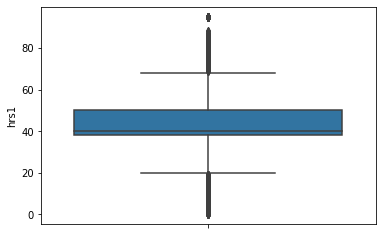

In [85]:
sns.boxplot(data=married_df, y='hrs1')
plt.show()

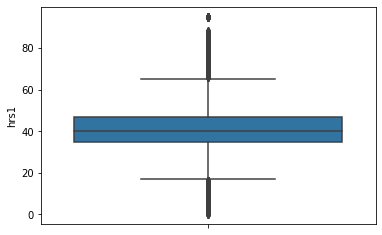

In [86]:
sns.boxplot(data=single_df, y="hrs1")
plt.show()

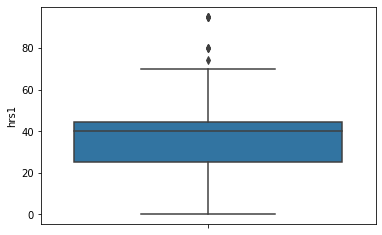

In [87]:
sns.boxplot(data=divorced_single_df, y="hrs1")
plt.show()

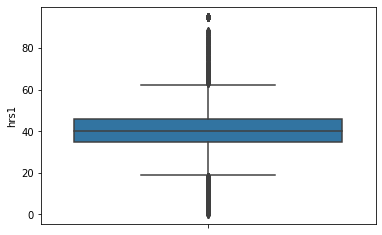

In [88]:
sns.boxplot(data=always_single_df, y='hrs1')
plt.show()

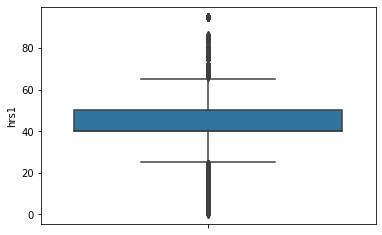

In [89]:
sns.boxplot(data=divorced_remarried_df, y='hrs1')
plt.show()

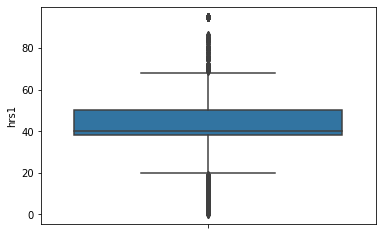

In [90]:
sns.boxplot(data=divorced_df, y='hrs1')
plt.show()

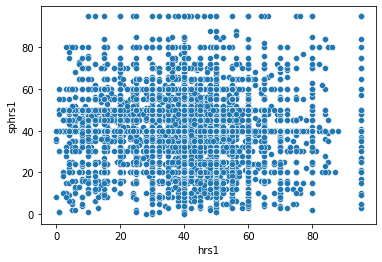

In [91]:
sns.scatterplot(data = df_usable, x = 'hrs1', y='sphrs1')
plt.show()

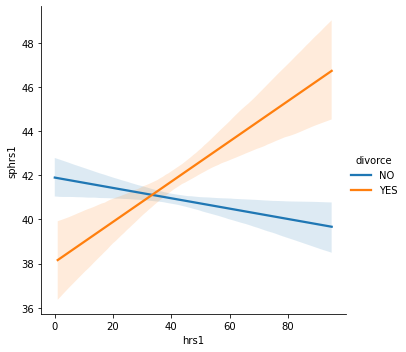

In [92]:
sns.lmplot(data=df_usable, x="hrs1", y="sphrs1", hue = "divorce", scatter = False)
plt.show()

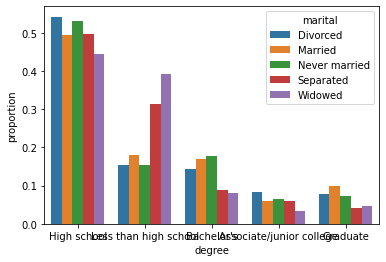

In [93]:
x, y, hue = "degree", "proportion", "marital"

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.show()

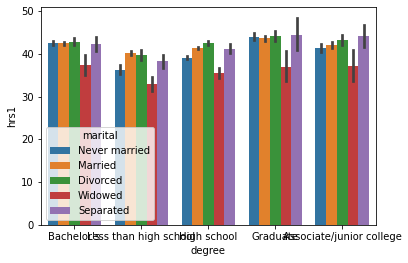

In [94]:
sns.barplot(data = df, x = 'degree', y = 'hrs1', hue = 'marital')
plt.show()

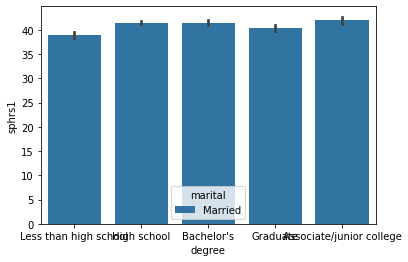

In [95]:
sns.barplot(data = married_df, x = 'degree', y = 'sphrs1', hue = 'marital')
plt.show()